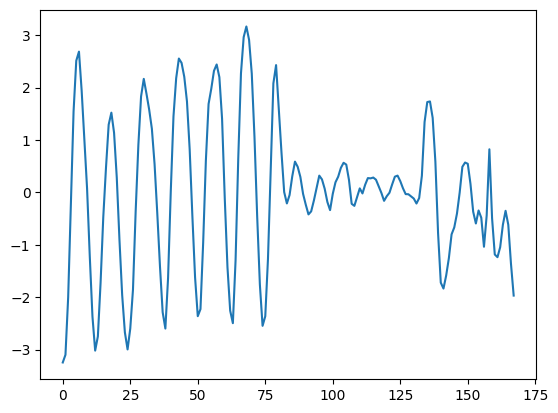

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
path_tf = os.path.abspath('C:\Stuff\Test\\transform.npy')
path = os.path.abspath('C:\Stuff\Test\poses.npy')
a = np.load(path)
a[:, 2, 3]
plt.plot(a[:, 2, 3])

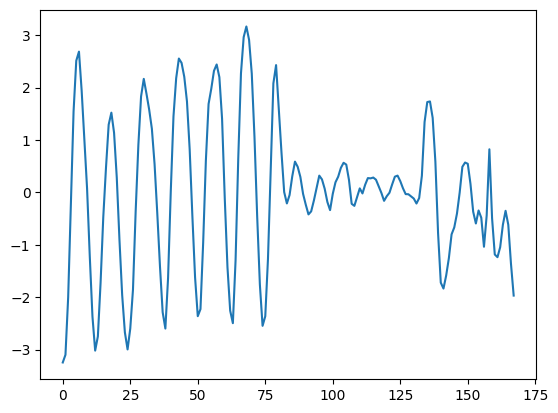

In [23]:
import matplotlib.pyplot as plt
import os
import numpy as np
# path_tf = os.path.abspath('C:\Stuff\Test\\transform.npy')
# path = os.path.abspath(r'C:\Stuff\Dataset-creation\dump\dump_poses\poses.npy')
path2 = os.path.abspath(r'C:\Stuff\Dataset-creation\dump\dump_poses\poses2.npy')

# a = np.load(path)
b = np.load(path2)
b[:, 2, 3]
plt.plot(b[:, 2, 3])

In [3]:
import matplotlib.pyplot as plt
import os
import numpy as np
path_tf = os.path.abspath('C:\Stuff\Test\\transform.npy')
path = os.path.abspath('C:\Stuff\Test\poses.npy')
a = np.load(path)
a[:, 2, 3]
# plt.plot(a[:, 2, 3])
max(a[:, 2, 3])
min(a[:, 2, 3])

-3.2458174

: 

In [37]:
def split_and_save_batches(original_array):
    # Create an empty dictionary to store batches
    batches = {}
    num_ranges = 10

    # Sort the original array
    sorted_array = sorted(enumerate(original_array), key=lambda x: x[1])

    # Calculate the batch size
    batch_size = len(original_array) // num_ranges

    # Split the sorted array into num_ranges batches
    for i in range(num_ranges):
        start_index = i * batch_size
        end_index = (i + 1) * batch_size if i < 9 else None
        batch = sorted_array[start_index:end_index]

        # Extract IDs from the batch and save them in the dictionary
        batch_ids = [item[0] for item in batch]
        batches[f'Batch_{i+1}'] = {'values': [item[1] for item in batch], 'ids': batch_ids}

    return batches

# Example usage:
original_array = [4, 2, 7, 1, 5, 9, 3, 8, 6, 10]
result = split_and_save_batches(a[:, 2, 3])

# Print the result
for batch_name, batch_data in result.items():
    print(batch_data)
    
    print(len(batch_data['ids']))

{'values': [-3.2458174, -3.0988553, -3.0192394, -2.9967349, -2.7481565, -2.669503, -2.598708, -2.5979083, -2.5468688, -2.4959338, -2.371957, -2.363575, -2.362652, -2.2880123, -2.2563179, -2.227578], 'ids': [0, 1, 12, 24, 13, 23, 38, 25, 74, 63, 11, 75, 50, 37, 62, 51]}
16
{'values': [-2.003628, -1.96955, -1.9584455, -1.8577209, -1.8351952, -1.7586647, -1.7294248, -1.7225463, -1.6343598, -1.620523, -1.5862687, -1.4281106, -1.4099951, -1.3625457, -1.2966988, -1.2702465], 'ids': [2, 167, 22, 26, 141, 73, 14, 140, 39, 49, 142, 61, 36, 166, 64, 76]}
16
{'values': [-1.2544147, -1.2365716, -1.216415, -1.1851205, -1.0463859, -1.0376203, -0.9580264, -0.90834874, -0.8015423, -0.78103125, -0.66811335, -0.61921155, -0.6176569, -0.59390014, -0.49353373, -0.48350376], 'ids': [143, 161, 10, 160, 162, 156, 52, 21, 144, 139, 145, 163, 165, 153, 159, 155]}
16
{'values': [-0.47530162, -0.45456183, -0.44988436, -0.4417414, -0.42035878, -0.40341902, -0.3970967, -0.36868513, -0.362552, -0.3596123, -0.351503

In [35]:
import re
import matplotlib.pyplot as plt
from pathlib import Path
import os
import json
directory = os.path.join(os.getcwd(), 'images')
path_stump_ranges = 'C:\Stuff\Dataset-creation\data\stump-range'

for folder in os.listdir(path_stump_ranges):
    digits = int(re.findall(r'\d+', folder)[0])//10
    batch_name = 'Batch_' + str(digits)
    ids = result[batch_name]['ids']

    path_transforms = os.path.join(path_stump_ranges, folder, 'transforms.json') 
    f = open(path_transforms)
    file = json.load(f)
    new_frames = []
    
    for i, frame in enumerate(file['frames']):
        if 'train' in frame['file_path']:
            id = int(frame['file_path'][-7:][:-4])-1 # get last 6 characters of file path like '001.jpg' and delete '.jpg' via [:-4].
            if id in ids:
                new_frames.append(frame)
        elif 'eval' in frame['file_path']: 
            new_frames.append(frame)
    
    file['frames'] = new_frames
    with open(path_transforms, "w") as jsonFile:
        json.dump(file, jsonFile, indent=4)    